<a href="https://colab.research.google.com/github/talha469/Stock-Price-Prediction-TSA/blob/main/Stock_Price_Prediction_using_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.DataFrame({'month': [1, 20, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})

df.set_index('month')

,year,sale
month,,
1,2012,55
20,2014,40
7,2013,84
10,2014,31


In [3]:
df = pd.read_csv('/content/BAJFINANCE.csv')
df.head(-10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,2020-08-11,BAJFINANCE,EQ,3442.95,3462.30,3494.55,3404.7,3453.95,3457.40,3446.88,5571895,1.920567e+15,197381.0,339137.0,0.0609
5056,2020-08-12,BAJFINANCE,EQ,3457.40,3425.00,3450.00,3362.0,3421.00,3418.25,3413.77,5662542,1.933063e+15,202448.0,368471.0,0.0651
5057,2020-08-13,BAJFINANCE,EQ,3418.25,3450.00,3472.00,3401.0,3415.40,3419.65,3438.56,4663383,1.603534e+15,148654.0,396103.0,0.0849
5058,2020-08-14,BAJFINANCE,EQ,3419.65,3425.00,3448.80,3306.2,3331.00,3331.10,3374.14,5532004,1.866575e+15,206024.0,702024.0,0.1269


In [4]:
df.isna().sum()
df.shape

(5070, 15)

In [5]:
df.dropna(inplace=True)
df.shape

(2291, 15)

In [6]:

df.set_index('Date',inplace=True)
df.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799
2011-06-08,BAJFINANCE,EQ,619.15,604.00,645.00,604.00,633.25,635.60,634.65,26863,1.704859e+12,881.0,15202.0,0.5659
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,1.994715e+12,894.0,18626.0,0.5960
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,1.958588e+12,1360.0,12656.0,0.4098
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,2.479856e+11,250.0,1745.0,0.4383


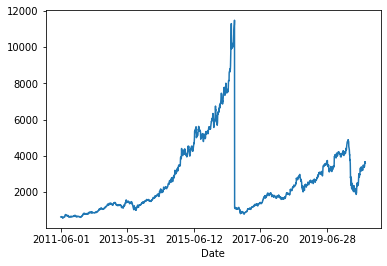

In [7]:
df['VWAP'].plot()

In [8]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [10]:
data = df.copy()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [11]:
selectedFeatures = ['High','Low','Volume','Turnover','Trades']
windowSize1 = 3
windowSize2 = 7

for feature in selectedFeatures:
  data[feature+'_meanrollingFeature3'] = data[feature].rolling(window = windowSize1).mean()
  data[feature+'_meanrollingFeature7'] = data[feature].rolling(window = windowSize2).mean()
  data[feature+'_meanrollingFeature3'] = data[feature].rolling(window = windowSize1).std()
  data[feature+'_meanrollingFeature7'] = data[feature].rolling(window = windowSize2).std()

In [12]:
data.shape

(2291, 24)

In [13]:
data.isna().sum()

Symbol                          0
Series                          0
Prev Close                      0
Open                            0
High                            0
Low                             0
Last                            0
Close                           0
VWAP                            0
Volume                          0
Turnover                        0
Trades                          0
Deliverable Volume              0
%Deliverble                     0
High_meanrollingFeature3        2
High_meanrollingFeature7        6
Low_meanrollingFeature3         2
Low_meanrollingFeature7         6
Volume_meanrollingFeature3      2
Volume_meanrollingFeature7      6
Turnover_meanrollingFeature3    2
Turnover_meanrollingFeature7    6
Trades_meanrollingFeature3      2
Trades_meanrollingFeature7      6
dtype: int64

In [14]:
data.dropna(inplace=True)
data.shape

(2285, 24)

In [19]:
#Splitted data into train test
training = data[0:1800]
testing = data[1800:len(data)]
independent.shape

(1800, 24)

In [ ]:
!pip install pmdarima

In [22]:
from pmdarima import auto_arima
model = auto_arima(y = training['VWAP'],exogenous = training[selectedFeatures], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15142.602, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15159.745, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15145.902, Time=0.84 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15145.543, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26850.752, Time=0.65 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15149.379, Time=1.87 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15165.804, Time=1.78 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15137.277, Time=2.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15149.072, Time=2.08 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=15171.861, Time=2.51 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=15172.154, Time=2.47 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15170.069, Time=2.23 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=15149.041, Time=2.28 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=15174.154, Time=2.63 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=15135.297, Time=2.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15140.629, Time=1.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=15147.101, Time=1.86 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=15169.889, Time=2.30 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=15170.182, Time=2.38 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15163.835, Time=1.59 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=15168.098, Time=2.01 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=15147.069, Time=2.04 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=15172.182, Time=2.52 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 44.922 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [27]:
model = model.fit(training['VWAP'],training[selectedFeatures])

In [29]:
import pickle
filename = '/content/ARIMAStockPrediction.pkl'
pickle.dump(model, open(filename, 'wb'))

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
forecast = loaded_model.predict(n_periods = len(testing), exogenous = testing[selectedFeatures])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


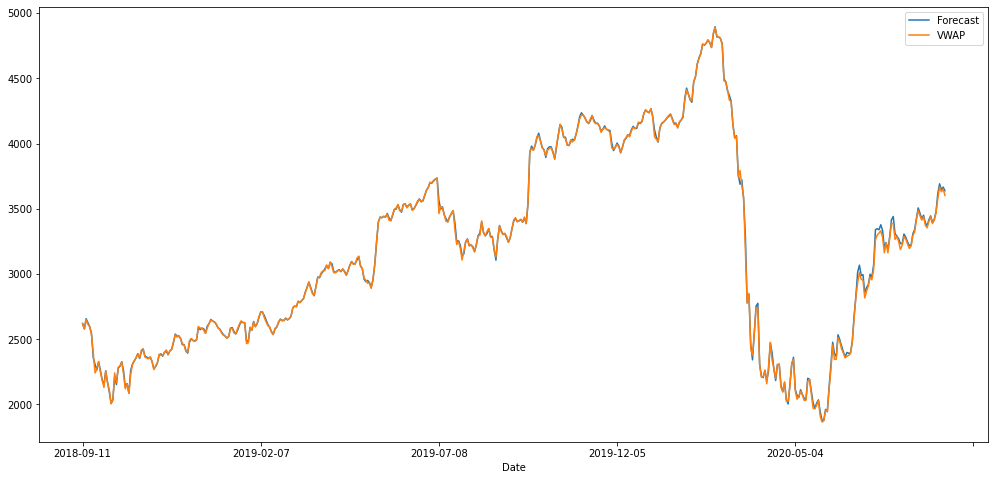

In [42]:
testing['Forecast'] = forecast
testing[['Forecast','VWAP']].plot(figsize=(17,8))

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
np.sqrt(mean_squared_error(testing['VWAP'],testing['Forecast']))

17.407100686358838

In [41]:
mean_absolute_error(testing['VWAP'],testing['Forecast'])

10.462176618314956